# Segmenting Data with k-Means Clustering

## Learning Objectives
The primary objective of clustering is to group items within a dataset based on similarity. **k-Means Clustering** is one of the most popular and easy to use clustering approaches. With k-Means Clustering, similarity is based on a distance metric known as euclidean distance. By the end of this tutorial, you will have learned:
+ How to import, explore and prepare data for k-Means Clustering
+ How to segment data using k-Means Clustering
+ How to evaluate and visualize clusters
+ How to choose an appropriate number of clusters
+ How to analyze the results of k-Means Clustering

## 1. Collect the Data
Let's import and preview it:

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df= pd.read_csv("mallcustomers.csv")


Saving mallcustomers.csv to mallcustomers.csv


In [ ]:
df.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


## 2. Explore the Data
Next, let's get a concise summary of the structure and the values within the dataset:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


A visual exploration of the dataset can provide us with some additional insight.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

<Axes: xlabel='Gender', ylabel='Income'>

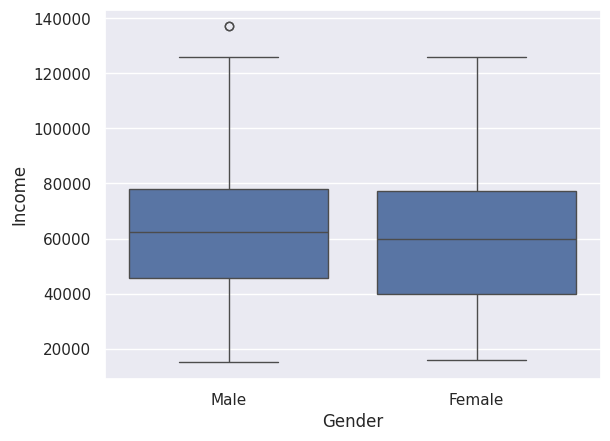

In [ ]:
 sns.boxplot( x = 'Gender',y = 'Income', data = df)

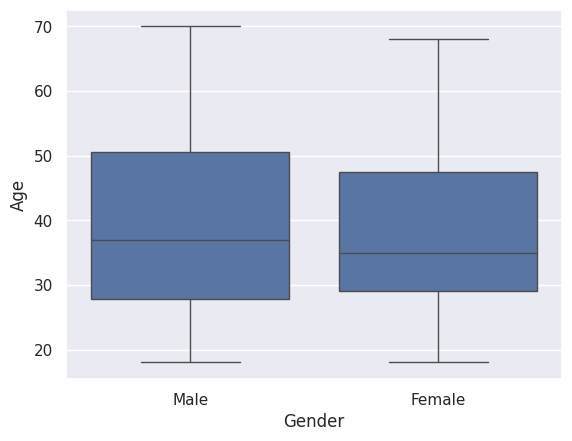

In [ ]:
sns.boxplot(x = 'Gender',y = 'Age', data = df)

<Axes: xlabel='Gender', ylabel='SpendingScore'>

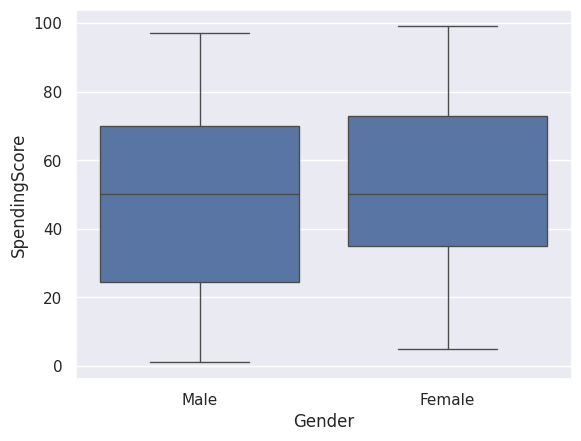

In [ ]:
sns.boxplot(x = 'Gender', y = 'SpendingScore', data=df)

<Axes: xlabel='Age', ylabel='Income'>

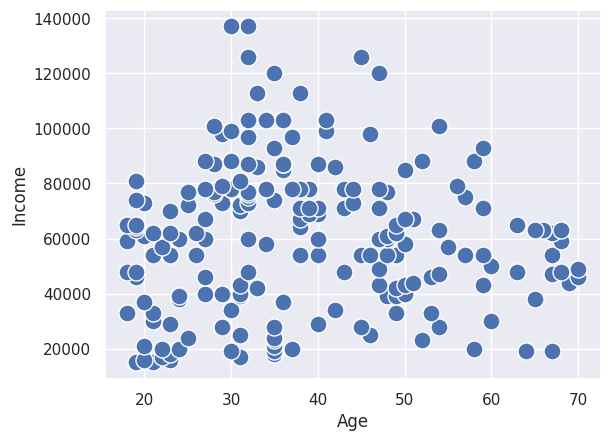

In [ ]:
sns.scatterplot(x = 'Age', y = 'Income',data = df, s=150)


<Axes: xlabel='Age', ylabel='SpendingScore'>

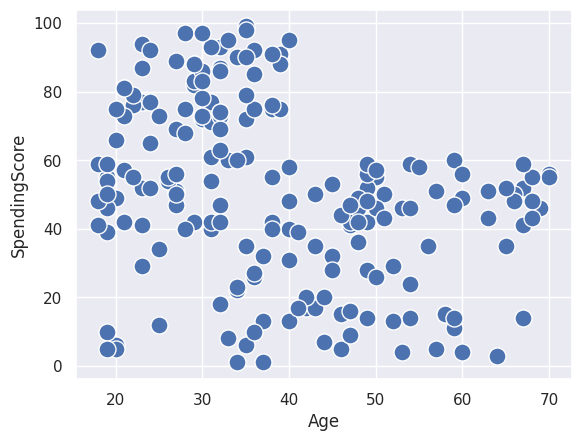

In [ ]:
sns.scatterplot(data = df, x = 'Age', y = 'SpendingScore',s = 150)

<Axes: xlabel='Income', ylabel='SpendingScore'>

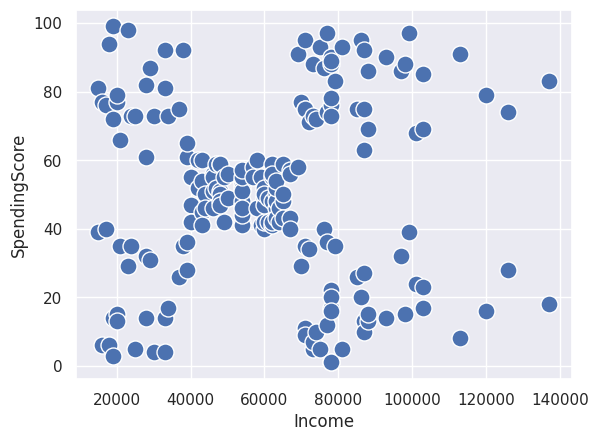

In [ ]:
sns.scatterplot(data = df, x = 'Income', y = 'SpendingScore',s = 150)

## 3. Prepare the Data

In [ ]:
df[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X= df[['Income', 'SpendingScore']]
df_scaled = scaler.fit_transform(X)
df_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns = X.columns)
df_scaled.describe().round(2)
df_scaled

,Income,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## 3. Create the Clusters

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [ ]:
km.fit(df_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [ ]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [ ]:
km.inertia_

157.70400815035939

## 4. Evaluate and Visualize the Clusters

In [ ]:
pd.Series(km.labels_).value_counts().sort_index()


,count
0,38
1,39
2,123


In [ ]:
km.cluster_centers_

array([[ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275],
       [-0.62618966, -0.01439238]])

In [ ]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = X.columns)
cluster_centers

,Income,SpendingScore
0,1.009200,-1.225535
1,0.991583,1.239503
2,-0.626190,-0.014392


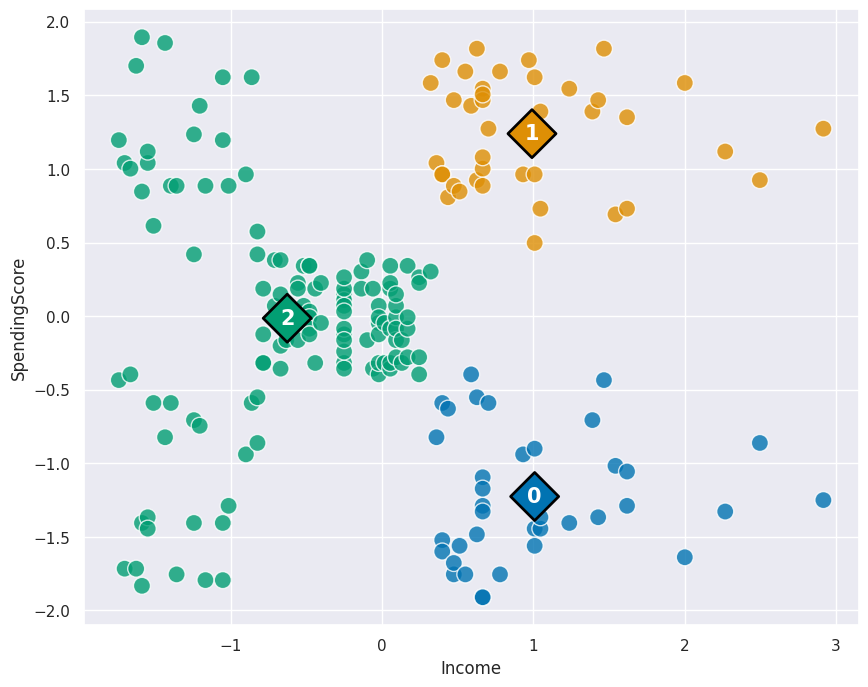

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
sns.scatterplot(
    data=df_scaled,               # The scaled dataset
    x='Income',                   # X-axis: Income (standardized)
    y='SpendingScore',            # Y-axis: Spending Score (standardized)
    hue=km.labels_,             # Color by cluster label (from KMeans)
    palette='colorblind',         # Color palette
    alpha=0.8,                    # Transparency of dots
    s=150,                        # Size of dots
    legend=False)                 # Hides the legend


#Plot the Centroids        # hue = cluster_centers.index,
sns.scatterplot(
               data = cluster_centers,
               x = 'Income',
               y = 'SpendingScore',
               hue = cluster_centers.index,  #Use the index (e.g., 0, 1, 2) to color each centroid differently (matching cluster color)
               palette = 'colorblind', #km.labels_ corresponds directly to the rows in df_scaled.
               s = 600,
               marker = 'D',
               ec = 'black',
               legend = False)

#add centroid lebels
for i in range(len(cluster_centers)):
    plt.text(
        x = cluster_centers.Income[i],
        y = cluster_centers.SpendingScore[i],
        s = str(i),
        color = 'white',
        size = 15,
        weight = 'bold',
        ha = 'center',
        va ='center'
    )

## 5. Choose the right number of Clusters

### The Within Cluster Sum of Squares (WCSS)

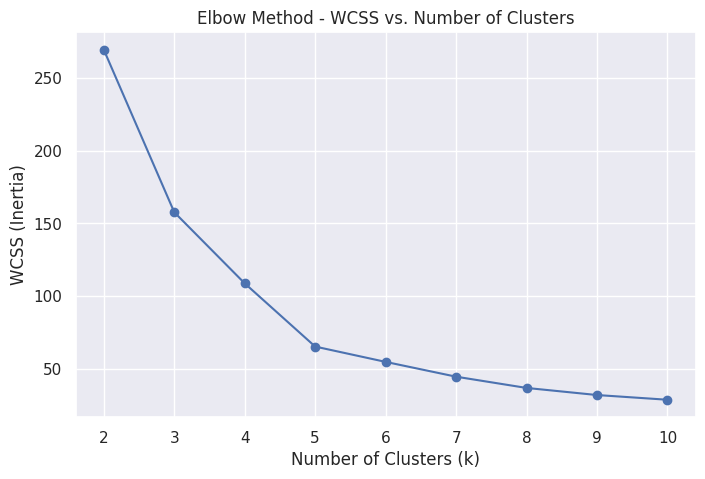

In [ ]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method - WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

### The Average Silhouette Score

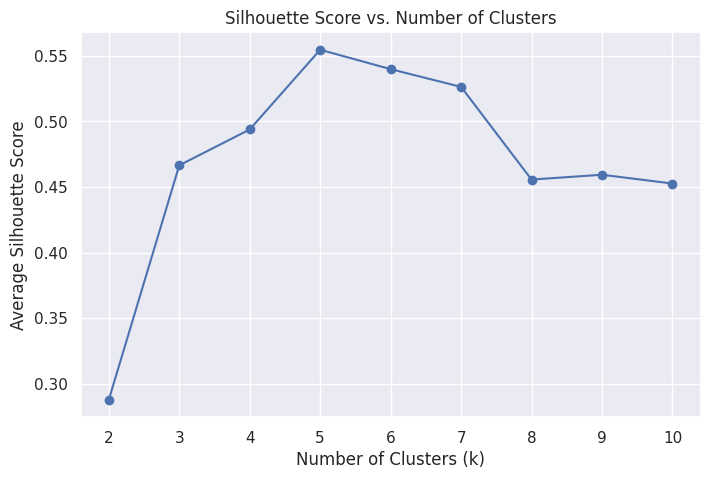

In [ ]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(df_scaled)
    score = silhouette_score(df_scaled, km.labels_)
    silhouette.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

## 6. Analyze and Interpret the Clusters

In [ ]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(df_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [ ]:
km.cluster_centers_
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = X.columns)
cluster_centers

,Income,SpendingScore
0,-1.307519,-1.136965
1,0.991583,1.239503
2,-1.329545,1.132178
3,1.055003,-1.284439
4,-0.200913,-0.026456


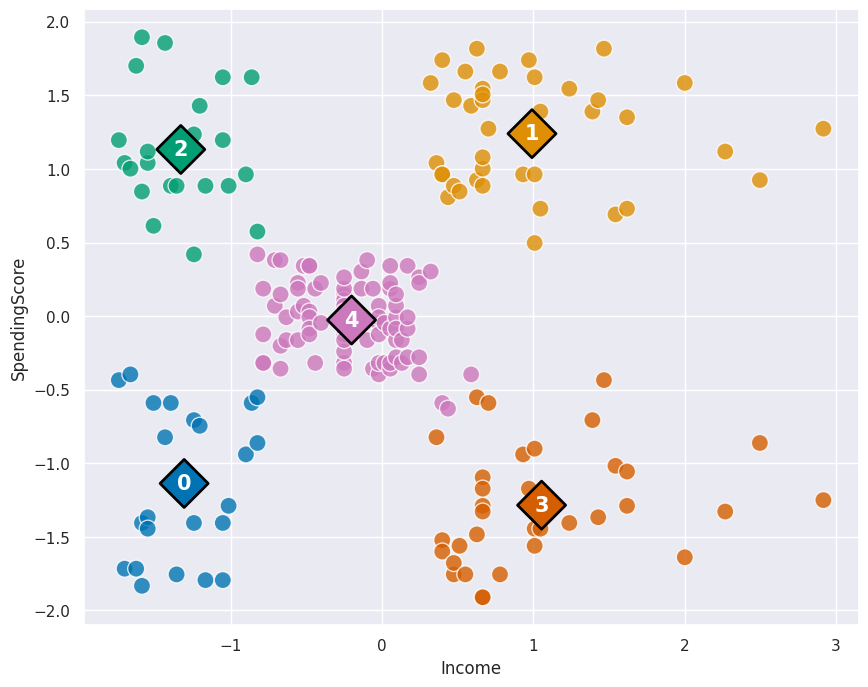

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = df_scaled,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = km.labels_,
                     palette = 'colorblind',
                     alpha = 0.8,
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers,
                     x = 'Income',
                     y = 'SpendingScore',
                     hue = cluster_centers.index,
                     palette = 'colorblind',
                     s = 600,
                     marker = 'D',
                     ec = 'black',
                     legend = False)


# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i],
                        y = cluster_centers.SpendingScore[i],
                        s = i,
                        ha='center',
                        va='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [ ]:
df['Cluster'] = km.labels_.tolist()
df.head(10)

[0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 4,
 0,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 3,
 1,
 4,
 1,
 3,
 1,
 3,
 1,
 4,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 4,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1]

In [ ]:
df = pd.get_dummies(df, columns = ['Gender'],dtype=int)
df.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,2,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,2,1,0
4,5,31,17000,40,0,1,0
5,6,22,17000,76,2,1,0
6,7,35,18000,6,0,1,0
7,8,23,18000,94,2,1,0
8,9,64,19000,3,0,0,1
9,10,30,19000,72,2,1,0


In [ ]:
df.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

,0
Gender_Female,0.56
Gender_Male,0.44
Age,36.00
Income,61500.00
SpendingScore,50.00


In [ ]:
df.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.54,0.46,32.0,79000.0,83.0
2,0.59,0.41,23.5,24500.0,77.0
3,0.46,0.54,42.0,85000.0,16.0
4,0.59,0.41,46.0,54000.0,50.0
